In [1]:
from PIL import Image
from os import listdir
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pickle

from functools import cmp_to_key

from sklearn.cluster import KMeans

In [2]:
from scipy.cluster.vq import *

Importneme to co potrebujeme...

Nacitame si obrazky.

In [3]:
def fn(x, y):
    fileName1 = x.split('.')[0]
    fileName2 = y.split('.')[0]
    return int(fileName1) - int(fileName2)
    

images = list(filter(lambda a: a.find('.png') != -1, listdir('font-images/data')))
images = sorted(images, key=cmp_to_key(fn))

images = list(map(lambda a: 'font-images/data/' + a, images))

Takto vyzeraju moje data... (sam som si ich nascrapoval :))

In [4]:
def alphabet(k):
    fig = plt.figure(figsize=(13, 2))
    s = k * 26

    for i in range(0, 26):
        img = np.array(Image.open(images[s + i], 'r'))
        fig.add_subplot(2, 13, i + 1)
        plt.imshow(img)

    plt.show()

In [5]:
print("Mame celkovo " + str(int(len(images) / 26)) + " typov fontov.");

Mame celkovo 16 typov fontov.


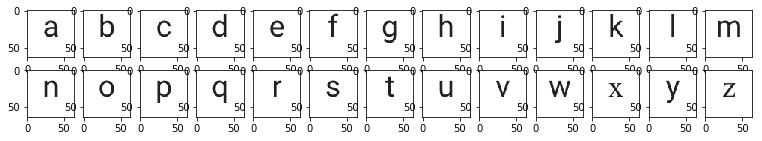

In [6]:
alphabet(0)

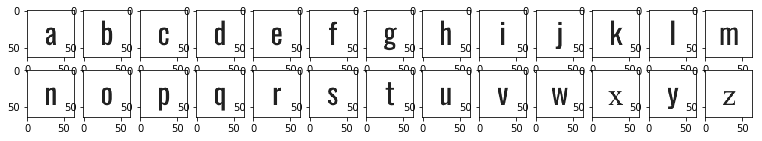

In [7]:
alphabet(8)

Spracujeme obrazky...

In [8]:
immatrix = np.array([np.array(Image.open(im)).flatten() for im in images], 'f')

Zoberieme KMeans.

In [9]:
cls = KMeans(n_clusters=26, random_state=420)

Polozime fit funkciu.

In [10]:
kmeans = cls.fit(immatrix)

Idem pozriet clustre, napr. ten prvy.

In [11]:
clusters = kmeans.labels_
clusters

array([ 8,  8,  8,  8,  8,  5,  8,  8,  5, 20,  3,  5, 15,  8,  8,  8,  8,
        6,  8,  5,  8, 14,  7,  3,  1,  3,  0,  0, 22, 17, 22, 20, 22,  0,
       20, 20, 10, 20, 12,  0, 17,  0, 17, 14, 22, 20,  0, 13, 18, 24, 13,
       24,  0,  0, 22, 17, 22, 20, 22,  0, 20, 20, 10, 20, 12,  0, 17,  0,
       17, 14, 22, 20,  0, 13, 18, 24, 13, 24, 23, 19, 23, 19, 23, 20, 23,
       19, 20, 20, 14, 20, 12, 19, 19, 19, 19, 14, 23,  6, 19, 13, 18, 14,
       13, 24,  2,  2,  2,  2,  2,  6, 25,  2,  5, 20,  3,  5, 15,  2,  2,
        2,  2,  6,  3,  6,  2,  1,  7, 14,  1, 14,  9, 11,  9,  9,  9,  5,
        9, 11,  5, 20,  3,  5, 15, 11,  9, 11,  9,  6,  3,  6,  9,  1,  7,
       14,  1, 14,  4,  4,  8,  4,  4, 16,  4,  4, 16, 16,  4, 16, 21,  4,
        4,  4,  4,  6,  4, 16,  4,  4, 21,  3,  4,  3, 25, 25, 25,  8, 25,
        5,  8, 25,  5, 20,  3,  5, 15, 25,  8, 25,  8,  6, 25,  5, 25, 14,
        7,  3, 14,  3, 10, 10, 10, 10, 10, 20, 10, 10, 20, 20, 10, 20, 20,
       10, 10, 10, 10, 14

In [12]:
def print_cluster(num):
    cluster = list(filter(lambda cluster_num: cluster_num[1] == num, enumerate(clusters)))
    size = len(cluster)
    
    fig = plt.figure(figsize=(20, 10))
    i = 0

    for image in cluster:
        i = i + 1
        img = np.array(Image.open(images[image[0]], 'r'))
        fig.add_subplot(10, 20, i)
        plt.imshow(img)

Pozrieme sa na prvy cluster.

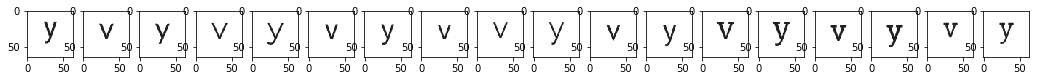

In [13]:
print_cluster(1)

Looool, vyzera to celkom dobre, vacisnu tam je _j_ , je tam aj _i_ co este chapem. Ale co tam robi _f, m a t (wtf?)_.

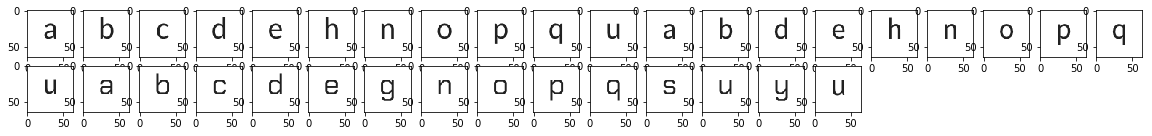

In [14]:
print_cluster(2)

Druhy cluster nespravilo uplne najlepsie, ale celkom moze byt. Mozem pozriet aj ostatne, ale neviem aky by to malo dalej zmysel.

Dufal som ze budem vediet rozoznat pismena z roznych fontov, to sa mi zial uplne nepodarilo.

Nabuduce to budem moct skusit vylepsit, alebo mozem skusit rozpoznavat cisla z roznych fontov. Mozem skusit rozne pristupy klastrovania a predspracovania (i ked to nebude treba) tych obrazkov, uvidime. :)

TODO: Pozriet velkosti zhukov. Pridat informacie do dat - napriklad. shapy - obluky, rovne ciary, atd. Vyhodnotenie clustrov. Clustrovanie cisiel. Skusit mozno DBSCAN... Porovnat vysledky...

## Pokracovanie...

In [15]:
from functools import *


def get_cluster_sizes(clusters):
    def fn(obj, num):
        obj[num] = 1 if not num in obj else obj[num] + 1
        return obj
    
    sizes = reduce(fn, clusters, {})

    df = pd.DataFrame({ 'cluster number': list(sizes.keys()), 'number of items': list(sizes.values()) }, columns=['cluster number', 'number of items'])
    df = df.set_index('cluster number').sort_index()
    return df
    
    
df = get_cluster_sizes(clusters)
df

,number of items
cluster number,
0,13
1,18
2,35
3,24
4,15
5,28
6,23
7,11
8,19


In [16]:
def visualise_cluster_sizes_1(df):
    df.plot.bar(y='number of items', rot=0)
    
def visualise_cluster_sizes_2(df):
    df.boxplot(column='number of items')

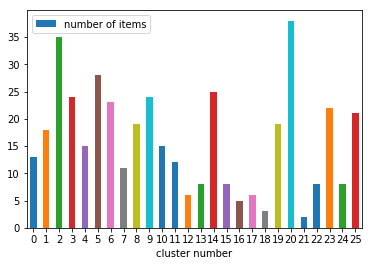

In [17]:
visualise_cluster_sizes_1(df)

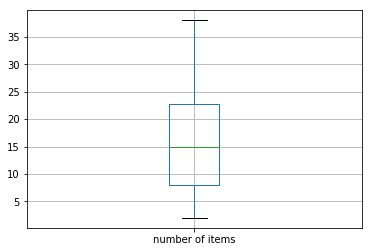

In [18]:
visualise_cluster_sizes_2(df)

Takze, vidime ze mame v niektorych clustroch prilis vela znakov, v inych velmi malo. To nieje co by sme chceli.

Skusim vyhodnotit moj cluster, spravim si truth pole. Budem merat ako dobre sa mi podarilo zaradit pismeno do clustra toho pismena.

In [19]:
y_test = list(map(lambda x: x [0] % 26, enumerate(immatrix)))
y_test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [20]:
from sklearn.metrics import homogeneity_score, completeness_score

def score(truth, prediction):
    print('homogeneity_score:', homogeneity_score(truth, prediction))
    print('completeness_score:', completeness_score(truth, prediction))

Kedze mame uz teda clustre olablovane, mozeme pouzit supervised metriku.

Pouzijeme na to homogeneity_score a completeness_score.

"Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class."
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

"A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster."

In [21]:
score(y_test, clusters)

homogeneity_score: 0.4886783147398281
completeness_score: 0.5173490487166529


Skusim extrahovat z pixelov pocet bielych ploch. Takto mozem napriklad rozlisi c od d.

In [22]:
import collections

WHITE = 250

images_white_board_counts = [0] * len(images)
_immatrix = np.array([np.array(Image.open(im)) for im in images], 'f')

for index, image in enumerate(_immatrix):
    counter = 0
    for y, _ in enumerate(image):
        for x, _ in enumerate(image[y]):
            
            pixel = image[y][x]
            avg = sum(pixel) / len(pixel)

            if avg >= WHITE:
                counter += 1
                
                queue = collections.deque([x, y])
                k = 0
                while queue: 
                    k += 1
                    _x = queue.popleft()
                    _y = queue.popleft()

                    if (sum(image[_y][_x]) / len(image[_y][_x])) < WHITE:
                        continue
                        
                    image[_y][_x] = [0, 0, 0, 0] # set as visited

                    for move in [[-1, 0], [1, 0], [0, 1], [0, -1]]:
                        next_x = _x + move[0]
                        next_y = _y + move[1]

                        if next_y >= 0 and next_x >= 0 and next_y < len(image) and next_x < len(image[_y]):
                            color = (sum(image[next_y][next_x]) / len(image[next_y][next_x]))
                            if color >= WHITE:
                                queue.append(next_x)
                                queue.append(next_y)
        
    images_white_board_counts[index] = counter

In [23]:
images_white_board_counts

[2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,


In [24]:
def add_white_board_counts_fn(a):
    index, img = a
    img = np.append(img, [images_white_board_counts[index]])
    return img

In [25]:
def add_white_board_counts(immatrix):
    return list(map(add_white_board_counts_fn, enumerate(immatrix)))

In [26]:
immatrix = add_white_board_counts(immatrix)

Polozim KMeans.

In [27]:
cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.4886783147398281
completeness_score: 0.5173490487166529


Trosku som si vylepsil score.

In [28]:
df = get_cluster_sizes(clusters)

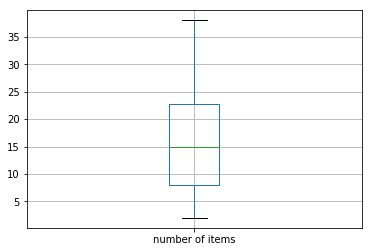

In [29]:
visualise_cluster_sizes_2(df)

Skusim zredukovat dimenzionalitu pre kazdy obrazok, mame tam momentalne strasne vela features.
To je image_size_x * image_size_y * rgba.
Co je 64 * 64 * 4. (Vsetky obrazky mame rovnake)

Urobim priemernu farbu pre kazde 2 pixely. Yolo.

In [30]:
def reduce_dim(img, mul = 2):
    step = 4 * mul
    
    result_img = []
    
    for x in range(0, len(img), step): # RGBA * n of pixels
        pixel = 0
        
        for y in range(x, x + step):
            pixel += img[y]
        
        result_img.append(int(pixel / step))
        
    return result_img

immatrix = np.array([reduce_dim(np.array(Image.open(im)).flatten()) for im in images], 'f')

Pre kazdy obrazok pridam aj informaciu o pocte bielych ploch.

In [31]:
immatrix = add_white_board_counts(immatrix)

In [32]:
cls = KMeans(n_clusters=26, random_state=420)
kmeans = cls.fit(immatrix)
clusters = kmeans.labels_

score(y_test, clusters)

homogeneity_score: 0.49411559955810497
completeness_score: 0.538347285488584


No nic moc. :D

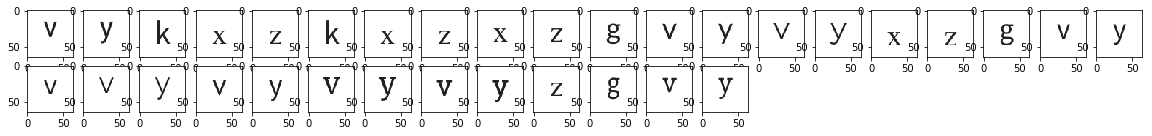

In [33]:
print_cluster(1)

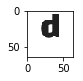

In [34]:
print_cluster(2)

Lol, tuto su spolu v clustri dokonca znaky s roznym poctom bielych miest.

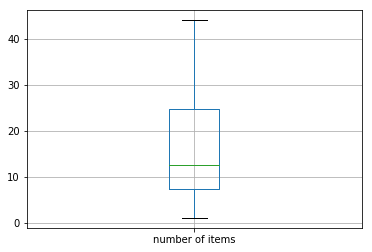

In [35]:
df = get_cluster_sizes(clusters)
visualise_cluster_sizes_2(df)

Stale su tie pocty v clustroch velmi variabilne.

Skusim este ine sposoby clustrovania.

In [36]:
from sklearn.cluster import DBSCAN

immatrix = np.array([np.array(Image.open(im)).flatten() for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

clustering = DBSCAN(eps=0.25, min_samples=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.16750140660493765
completeness_score: 0.5484062777993638


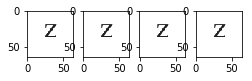

In [37]:
print_cluster(1)

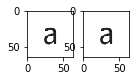

In [38]:
print_cluster(2)

LEL. Vyzera to dobre. Zatial.

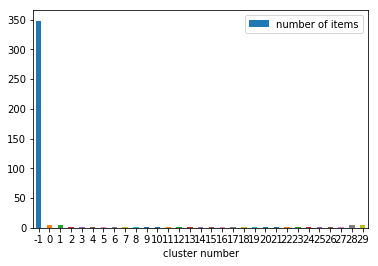

In [39]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

LOL 350 outlayerov.

Vyzera to tak ze to clastruje velmi precizne, az prilis. Redukcia dimenzionality mozno pomoze. Rovno znormalizujem vsetky farby.

In [40]:
def normalize(immatrix):
    return list(map(lambda x: 1 if x <= 128 else 0, immatrix))

In [41]:
immatrix = np.array([normalize(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [42]:
clustering = DBSCAN(eps=.58, min_samples=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.24379434785883272
completeness_score: 0.5436461737875931


Trochu som sa pohral s parametrami. Maximum som dosiahol 0.37 homogenity score, avsak! mal som velmi vela clustrov.

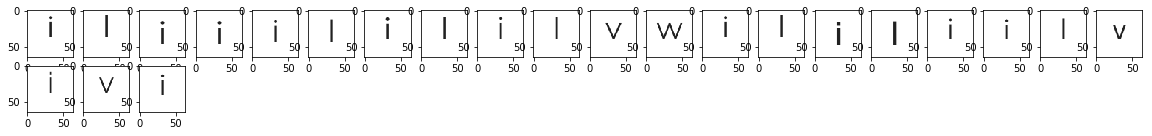

In [43]:
print_cluster(0)

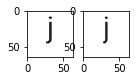

In [44]:
print_cluster(1)

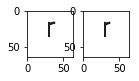

In [45]:
print_cluster(2)

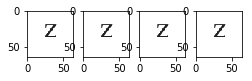

In [46]:
print_cluster(5)

Celkom ok.

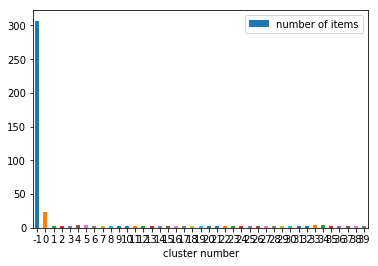

In [47]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

No hecnem este meanshift.

In [48]:
immatrix = np.array([normalize(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [49]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=2).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.917708836455697
completeness_score: 0.5581795604634678


WHAAAAAAAT, YOLOOOO, Dufam ze tam nebude privela clustrov :)))

In [50]:
df = get_cluster_sizes(clusters)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 1 columns):
number of items    303 non-null int64
dtypes: int64(1)
memory usage: 4.7 KB


In [51]:
df.head()

,number of items
cluster number,
0,45
1,5
2,6
3,4
4,4


No je ich celkom vela, 300 :(

Pohram sa s atributmi...

In [52]:
immatrix = np.array([normalize(reduce_dim(np.array(Image.open(im)).flatten(), 4)) for im in images], 'f')
immatrix = add_white_board_counts(immatrix)

In [53]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=5.0).fit(immatrix)
clusters = clustering.labels_

score(y_test, clusters)

homogeneity_score: 0.10609232596483929
completeness_score: 0.4657422942318254


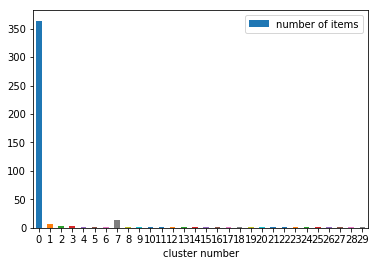

In [54]:
df = get_cluster_sizes(clusters)

visualise_cluster_sizes_1(df)

Neuspesne :(

To je asi zatial vsetko.

TODO: Skusit pocet ciernych ploch. Skusit detekciu poctu hran, poctu rohov, poctu oblukov? (scikit-image) Fix, redukcia dimenzionality! Skusit inu metriku v clusteringu.